# Разработка модели поиска референсных фотографий по запросам фотографов

Фотохостингу для профессиональных фотографов «Со Смыслом» (“With Sense”) требуется экспериментальная модель, которая могла бы помогать фотографам выводить фото по их запросам, для этого необходимо обучить модель машинного обучения на фотографиях и запросах от пользователей сервиса. Сама работа будет выполнятся в следующем порядке:

1. Загрузка необходимых библиотек и данных.
2. Исследовательский анализ данных.
3. Предобработка данных.
4. Фильтрация данных.
5. Векторизация и сборка признаков состоящий из под пунктов:
    * "Векторизация изображений";
    * "Векторизация текстов";
    * "Объединение векторов".
6. Обучение моделей.
7. Тестирование.
8. Общий вывод по работе.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет! Похоже мы уже встречались, но представлюсь повторно. Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Да, я очень хорошо вижу что проект не закончен если быть откровенным - это формальный повод для возврата проекта без проведения ревью.  Все очень просто - сырой не законченный проект - это тройная нагрузка на ревьюера, а проект и без того не самый простой.
    
Я не буду в деталях комментировать каждый шаг, но пробегусь по наиболее критичным моментам, постараюсь подсветить ключевые ошибки в логике.    
 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">


Первое, что нужно исправить, — это структура и оформление проекта. Это не формальное замечание: четкая структура необходима, чтобы и автор, и читатель (например, коллега или ревьюер) могли легко ориентироваться в коде и логике исследования.

Пожалуйста, реструктурируй ноутбук в соответствии со следующим планом, выделив ключевые разделы с заголовками и выводами по каждому:

1.  **Название и описание проекта.** В самом начале необходимо добавить заголовок и краткое описание целей и задач проекта.
2.  **Исследовательский анализ данных (EDA).** Требуется отдельный раздел для полноценного анализа **всех** исходных данных. Сейчас анализ очень поверхностный и смешан с предобработкой. Ключевой результат EDA — это выводы об особенностях "сырых" данных, на основе которых строится план предобработки.
3.  **Предобработка данных.** Этот этап должен идти **после** EDA. Его результат — готовый к дальнейшей работе датафрейм, содержащий пары `(image, query_id, query_text)` и их итоговую оценку `target`.
4.  **Фильтрация данных.** Процесс удаления изображений с детьми также должен быть вынесен в отдельный, четко обозначенный раздел.
5.  **Векторизация и сборка признаков.** Этот большой шаг следует разбить на три логические части: "Векторизация изображений", "Векторизация текстов" и "Объединение векторов".
6.  **Обучение моделей** и **Тестирование.** Эти финальные этапы также должны быть оформлены как самостоятельные разделы с четкими выводами по каждому.
    
    
 </div>

## 1. Установка библиотек и загрузка данных

In [20]:
#!pip install transformers -q
#!pip uninstall tensorflow keras -y
#!pip install tensorflow==2.12.0
#!pip install -U huggingface_hub -q
#!pip install catboost -q
#!pip install tensorflow.keras
#use python <= 3.8.11
#!pip install -U sentence-transformers
#!pip install hf_xet

In [21]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (cross_validate,
                                     train_test_split,
                                     RandomizedSearchCV,
                                     GroupKFold)
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from sentence_transformers import SentenceTransformer
from tensorflow.keras.metrics import RootMeanSquaredError
from PIL import Image


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [22]:
#для загрузки данных создадим один общий путь к файлам и загрузим через него все файлы
general_path = 'D:/combine_4/'
train_dataset_path = os.path.join(general_path, 'train_dataset.csv')
test_queries_path = os.path.join(general_path, 'test_queries.csv')
test_images_path = os.path.join(general_path, 'test_images.csv')
expert_annotations_path = os.path.join(general_path, 'ExpertAnnotations.tsv')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Одна из самых важных тем в любом проекте — это работа с путями к данным. В коде сейчас используются **"захардкоженные" абсолютные пути**, например: `pth_1 = 'D:/combine_4/train_dataset.csv'`. "Захардкоженный" (от англ. hardcoded) означает, что путь жестко "вписан" в код.

Это приводит к проблеме: такой ноутбук невозможно запустить на другом компьютере, где структура папок отличается (например, на моем, где нет диска `D:`). Чтобы его проверить, приходится вручную исправлять все пути в коде.

Чтобы сделать код переносимым и профессиональным, используется следующий **паттерн**:

1.  **Создается одна базовая константа** для пути к папке с данными. 
2.  **Все остальные пути** к файлам строятся на основе этой константы с помощью функции `os.path.join()`. Эта функция сама подставляет правильный разделитель (`/` или `\`) в зависимости от операционной системы.

**Пример:**

```python
# Плохо (текущий вариант):
# pth_1 = 'D:/combine_4/train_dataset.csv'
# pth_5 = 'D:/combine_4/ExpertAnnotations.tsv'
# train_queries = pd.read_csv(pth_1, ',')
# expert_annotations = pd.read_csv(pth_5, '\\t', ...)

# Хорошо (как нужно сделать):
import os

# Одна константа в начале ноутбука
DATA_PATH = 'D:/combine_4' # Путь к папке с данными

# Осмысленные имена переменных
TRAIN_QUERIES_PATH = os.path.join(DATA_PATH, 'train_dataset.csv')
EXPERT_ANNOTATIONS_PATH = os.path.join(DATA_PATH, 'ExpertAnnotations.tsv')
        
train_queries = pd.read_csv(TRAIN_QUERIES_PATH, sep=',')
expert_annotations = pd.read_csv(EXPERT_ANNOTATIONS_PATH, sep='\\t', ...)
```

Пожалуйста, полностью переработай загрузку данных, следуя этому паттерну.
    
После этого, переност проекта на другую платформу потербует изменения только ОДНОЙ ЕДИНСТВЕННОЙ перменной    

</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Имена переменных `pth_1`, `pth_2` и т.д. не несут смысловой нагрузки. Код становится трудно читать, так как для понимания, какой файл загружается, нужно постоянно возвращаться к ячейке с их определением.

Хорошей практикой является использование "говорящих" имен, которые описывают содержимое переменной, например: `TRAIN_QUERIES_PATH`, `EXPERT_ANNOTATIONS_PATH`. Это делает код самодокументируемым.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Функция `file_read` в данном случае является избыточной. Она представляет собой "обертку" над стандартной функцией `pd.read_csv`, но не добавляет уникальной ценности. `pd.read_csv` и так выдаст понятную ошибку `FileNotFoundError`, если путь будет неверным.

Прямой вызов `pd.read_csv(...)` делает код более простым, чистым и легким для понимания, так как читателю не нужно искать определение кастомной функции, чтобы понять, что происходит.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Изменил загрузку датасетов на более правильный. Первый раз работаю локально с проектом и совсем не подумал про то, что ты мне написал.(Вторая итерация)

</div>

In [23]:
#с помощью созданных путей загрузим данные
train_queries = pd.read_csv(train_dataset_path, sep=',')
display('Тренировочная таблица с парой - изображение-запрос', train_queries.head())
train_queries.info()

'Тренировочная таблица с парой - изображение-запрос'

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [ ]:
test_queries = pd.read_csv(test_queries_path, sep='|', index_col=['Unnamed: 0'])
display('Тестовая таблица с запросами и изображениями которые могли бы их описать', test_queries.head())
test_queries.info()

'Тестовая таблица с запросами и зображениями которые могли бы их описать'

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [25]:
test_images = pd.read_csv(test_images_path, sep=',')
display('Тестовая таблица с названиемя изображений', test_images.head())
test_images.info()

'Тестовая таблица с названиемя изображений'

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [26]:
expert_annotations = pd.read_csv(expert_annotations_path, sep='\t', names=['image', 'query_id', 'first_expert', 'second_expert', 'third_expert'])
display('Таблица с экспертными оценками для пар изображение-запрос', expert_annotations.head())
expert_annotations.info()

'Таблица с экспертными оценками для пар изображение-запрос'

,image,query_id,first_expert,second_expert,third_expert
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image          5822 non-null   object
 1   query_id       5822 non-null   object
 2   first_expert   5822 non-null   int64 
 3   second_expert  5822 non-null   int64 
 4   third_expert   5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


Данные загружены и просмотрены. Несоответсвия содержания с названиями колонок не обнаружили, стиль написания некоторых таблиц был приведен к змеиному стилю. Пропусков в данных не обнаружено, проверим дополнительно нет ли дублирующихся строк.

Так как в нашем распоряжении есть оценки с крауд-сервиса и экспертные, выберем те которым можно больше доверять.  
В случае нашей работы хорошим решением будет доверится экспертной оценке и на их основе сделать одну общую.  
Общую оценку сделаем ссуммировав все оценки экспертов и выбрав для сумм уровень доверия в интервале от 0 до 1, где 0 - полностью не соответствует запросу, а 1 - полностью соответсвует запросу, при этом значения между ними понимаются как вероятность соответствия изображения запросу.

## 2. Исследование данных.

Проверим чтобы в наших таблицах не было одинаковых строк и при наличии удалим их.

In [27]:
#для проверки на дубликаты используем функцию
def completeness_check(ittor, table):
    value = ittor.duplicated().sum()
    print(f'Полных дубликатов в таблице {table} - {value}')

In [28]:
completeness_check(train_queries, 'c тренировочными запросами')

Полных дубликатов в таблице c тренировочными запросами - 0


In [29]:
completeness_check(test_queries, 'c тестовыми запросами')

Полных дубликатов в таблице c тестовыми запросами - 0


In [30]:
completeness_check(test_images, 'c тестовыми изображениями')

Полных дубликатов в таблице c тестовыми изображениями - 0


In [31]:
completeness_check(expert_annotations, 'c аннотациями експертов')

Полных дубликатов в таблице c аннотациями експертов - 0


Дубликатов не обнаружили. Рассмотрим какие оценки ставили эксперты для наших запросов, чтобы лучше понимать сколько запросов соответствуют изображениям.

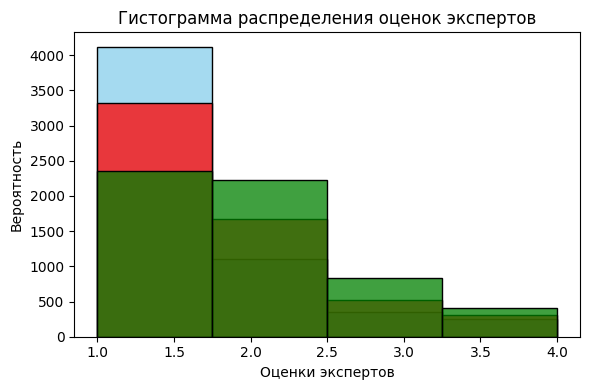

In [32]:
plt.figure(figsize=(6, 4))

sns.histplot(expert_annotations['first_expert'], bins=4, kde=False, color='skyblue')
sns.histplot(expert_annotations['second_expert'], bins=4, kde=False, color='red')
sns.histplot(expert_annotations['third_expert'], bins=4, kde=False, color='green')
plt.title('Гистограмма распределения оценок экспертов')
plt.ylabel('Вероятность')
plt.xlabel('Оценки экспертов')

plt.tight_layout()
plt.show()

Чтобы лучше понимать что значат оценки экспертов добавим расшифровку для них, где:  
* 1 — изображение и запрос совершенно не соответствуют друг другу;
* 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует;
* 3 — запрос и текст соответствуют с точностью до некоторых деталей;
* 4 — запрос и текст соответствуют полностью.   

На графике видим, что все три эксперта чаще всего ставили оценку 1. Примерно в половину меньше раз оценку 2, далее примерно четверть оценок имеют значение 3 и меньше всего с оценкой 4. Для нас это может означать, что запросов соответствующих нашим изображениям в датасете очень мало, поэтому обучение модели будет труднее.

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Честно говоря не знаю, что я могу тут исследовать, почти все данные это названия либо текст, я с таким не сталкивался до этого и тяжело что-то сказать.(Вторая итерация)

</div>

## 3. Предобработка данных

Для того чтобы получить колонку с общей оценкой и передать её в модель объединим колонки с оценками взяв их сумму.

In [33]:

expert_annotations['combined_mark'] = expert_annotations['first_expert'] + expert_annotations['second_expert'] + expert_annotations['third_expert']
display(expert_annotations.head())

,image,query_id,first_expert,second_expert,third_expert,combined_mark
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,3
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,4
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,4
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,5
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,4


In [34]:
#для разбивки сумм на вероятности, воспользуемся функцией
def probs(row):
    sum = row['combined_mark']
    mark = (sum -3) / 9
    return round(mark, 2)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">


Преобразование суммарной оценки экспертов в диапазон [0, 1] — это правильный шаг.

Однако текущая реализация с помощью жестко заданных порогов (`if sum <= 4`, `if sum <= 6` и т.д.) выглядит довольно громоздкой и не очень интуитивной. Такую сложную нелинейную зависимость сложно обосновать.

Гораздо более простым и стандартным подходом является **линейное преобразование**. Так как суммарная оценка (`combined_mark`) находится в диапазоне от 3 (1+1+1) до 12 (4+4+4), ее можно легко привести к шкале от 0 до 1 с помощью формулы:
`(оценка - 3) / 9`

Такой подход более универсален, математически обоснован и заменяет всю сложную функцию одной строкой кода.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Я иногда удивляюсь как я сам до этого не додумался)), у меня в голове похожая формула крутилась, но время было дороже :(, поэтому решил уже как есть оставить, спасибо за подсказку.(Вторая итерация)

</div>

In [35]:
#применим функцию, для получения новых оценок
expert_annotations['probabilities'] = expert_annotations.apply(probs, axis=1)
display(expert_annotations.head())

,image,query_id,first_expert,second_expert,third_expert,combined_mark,probabilities
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,3,0.00
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,4,0.11
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,4,0.11
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,5,0.22
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,4,0.11


Сделаем одну общую таблицу упростив последующую работу с ней

In [36]:
#объединим таблицы с тренировочными данными и экспертными запросами
train_with_marks = pd.merge(train_queries, expert_annotations, on=['image', 'query_id'], how='left')
display(train_with_marks.head())

train_with_marks.shape

,image,query_id,query_text,first_expert,second_expert,third_expert,combined_mark,probabilities
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,2,2,5,0.22
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4,4,4,12,1.00
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00


(5822, 8)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

Согласен с твоим решением отказаться от крауд оценок. Но на всякий случай подсвечу альтертанитвы. 
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Не очень удобно что оценки толпы и экспертов имеют разный вид, хоть я понимаю почему так и мне лично тяжело было бы их привести к чему-то одному при этом сохранив различие в уровне доверия к ним. И я еще не понимаю, почему у них разница в кол-ве строк, в crowd_annotations было 28 тыс строк, откуда такое число? Я их не использовал, поэтому не исследовал и не знаю. (Вторая итерация)

</div>

Проанализируем новый столбец с оценками с помощью графика

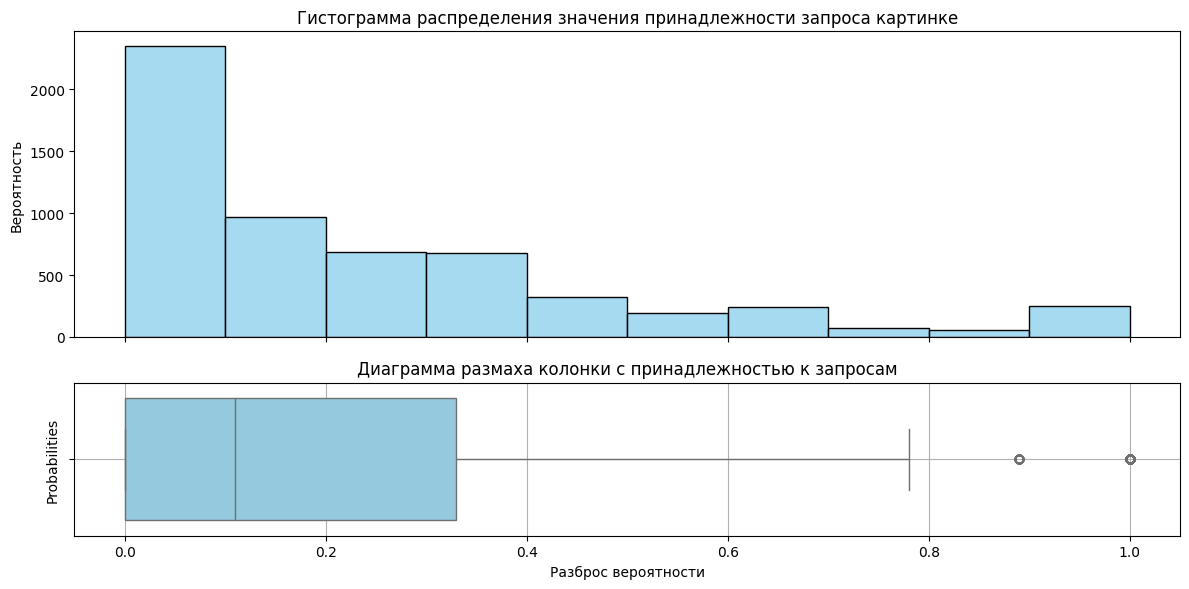

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]}, figsize=(12, 6))

sns.histplot(train_with_marks['probabilities'], bins=10, kde=False, ax=ax1, color='skyblue')
ax1.set_title('Гистограмма распределения значения принадлежности запроса картинке')
ax1.set_ylabel('Вероятность')

sns.boxplot(x=train_with_marks['probabilities'], ax=ax2, color='skyblue')
ax2.set_title('Диаграмма размаха колонки c принадлежностью к запросам')
ax2.set_xlabel('Разброс вероятности')
ax2.set_ylabel('Probabilities')
plt.grid('True')

plt.tight_layout()
plt.show()

График после преобразования оценок приобрел другой вид, теперь лучше видно распределение оценок. Так же на первом месте стоят оценки которые могли бы соответствовать еденице. Если смотреть на распределение по нижнему графику видно, что 75% оценок имеют вероятность меньше или равную 0.3, а те что ближе к единице вообще считаются выбросами, настолько их меньше чем других.

## 4.Фильтрация данных

Для исполнения правил использования изображений с детьми до 16 лет необходимо отобрать фотографии, на которых по описанию могут присутствовать дети и исключить их из общей выборки. Для более корректного отбора воспользуемся оценками экспертов с уровнем уверенности не менее 0.3, чтобы в запрос попали только изображения с действительно нарушающими правила изображениями.

In [156]:
#для выделения нужных слов описывающих возраст детей до 16 лет воспользуемся регулярным
#выражением и исключим из таблицы изображения, которые могут нарушать правила обработки изображений
banned_words = r'\b(boy|boys|girl|girls|child|children|baby|newborn|kid|kids|teenager|teen|junior)\b'
res = train_with_marks['query_text'].str.contains(banned_words)

print(len(train_with_marks[res].image.unique().tolist()),
      len(train_with_marks.image.unique().tolist()))

train_with_marks_clear = train_with_marks[~((train_with_marks.image.isin(train_with_marks[res].image.unique().tolist()))
                                                 & (train_with_marks['probabilities'] >= 0.3))].copy()
train_with_marks_clear = train_with_marks_clear.reset_index(drop=True)
train_with_marks_clear.shape

702 1000


d:\programmer\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(4662, 8)

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
(Нужно ли оставлять по итогу только уникальные изображения или можно использовать весь датасет? Если нужно, то как это лучше сделать учитывая мою фильтрацию с помощью оценок экспертов?) Не релеватно

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Продемонстрирован очень продуманный подход к фильтрации: используется не только список слов, но и порог уверенности в оценке (`probabilities >= 0.3`).

Однако, в финальной логике есть нюанс: текущий код удаляет только **пары**, где "плохая" картинка сочетается с высокой оценкой. В результате, пара `(Фото ребенка, Текст про закат)` с низкой оценкой останется в данных, хотя само изображение подлежит удалению.

Более надежный подход — двухэтапный:
1.  Сначала **сформировать список "запрещенных" изображений**.
2.  Затем **удалить все строки** из датасета, где `image` находится в этом списке.

Кстати, для Шага 1 есть "лайфхак", заложенный в сами данные. Имя файла "родного" изображения для каждого описания зашито в самом `query_id`. Если отрезать от `query_id` два последних символа (например, `.jpg#2` -> `.jpg`), получится имя файла, для которого этот текст был написан.

Таким образом, можно найти все тексты с "запрещенными" словами, извлечь из их `query_id` имена "родных" картинок и составить стопроцентно точный список изображений, подлежащих удалению.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Идея очень хорошая, но я пока не знаю повлияет ли это на обучение, поэтому сделаю такую фильтрацию уже после того как остальное решу. (вторая итерация)

</div>

По итогу фильтрации в датасете осталось 4662 пар изображение-запрос. Этого должно быть достаточно, чтобы модели смогли уловить связи между парами.

## 5. Векторизация изображений, текста и их объединение 

### 5.1 Векторизация изображений

Для перевода изображений в вектор воспользуемся классом ImageDataGenerator из библиотеки tensorflow

In [39]:
def load_train(path, df):
    train_datagen = ImageDataGenerator(#rotation_range=(45),
                                       #vertical_flip=True,
                                       rescale=1./255) 
    
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=df,
                                              directory=path,
                                              x_col='image',
                                              y_col='probabilities',
                                              target_size=(224, 224),
                                              batch_size=16,
                                              shuffle=False,
                                              class_mode='raw',
                                              seed=5678)
    
    return train_datagen_flow

def load_test(path, df):
    test_datagen = ImageDataGenerator(rescale=1./255)
 
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=df,
                                              directory=path,
                                              x_col='image',
                                              y_col=None,
                                              target_size=(224, 224),
                                              shuffle=False,
                                              batch_size=16,
                                              class_mode=None,
                                              seed=5678)
    
    return test_datagen_flow

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
В функции `load_train` используется аргумент `subset='training'`, но в самом `ImageDataGenerator` не задан `validation_split`.

В такой конфигурации Keras просто проигнорирует `subset` и будет использовать весь датафрейм, что, в принципе, и требуется. Чтобы сделать код более чистым и избежать путаницы, рекомендуется просто убрать аргумент `subset='training'` из вызова `flow_from_dataframe`, так как он здесь не выполняет никакой функции.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Увидел исправил, причем в тестовом загрузчике именно так и сделал). (вторая итерация)

</div>

In [40]:
#загрузим изображения
train_images = load_train(os.path.join(general_path, 'train_images'), train_with_marks_clear) #переработал с ипользованием general_path

Found 4662 validated image filenames.


In [41]:
#инициализируем модель для получения векторов
def image_model(input_shape):
    model = ResNet50(input_shape=input_shape,
                    weights='imagenet',
                    pooling='avg',
                    include_top=False)
    return model

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не понял вопрос.  NLTK это библиотека для работы с текстами, я не встречал там прогресс-бар. Возможно ты имеешь в виду tqdm?  Наверное никак.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Ой, да, тупанул. Жаль, было бы классно выведь прогресс, а не сидеть минут 15 смотреть как оно думает(вторая итерация)

</div>

In [42]:
#пропустим модель через изображения
resnet = image_model((224, 224, 3))
image_vector = resnet.predict(train_images, verbose=2)

292/292 - 620s - 620s/epoch - 2s/step


In [43]:
#сохраним изображения в отдельном столбце, предварительно поменяв их размерность и тип
image_embedding = image_vector.reshape(image_vector.shape[0], -1)

train_with_marks_clear['image_embedding'] = list(image_embedding)
display(train_with_marks_clear.head())

,image,query_id,query_text,first_expert,second_expert,third_expert,combined_mark,probabilities,image_embedding
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.007829939, 0.0, 1.2201952, 0.0, 0..."
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0, 0.0, 0.9342685, 0.0, 0.0, 0.62..."
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,2,2,5,0.22,"[0.0, 0.0, 0.0018150831, 0.0, 1.2082343, 0.0, ..."
3,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0, 0.0, 1.2475461, 0.0, 0.0, 1.00..."
4,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0014419653, 0.0, 0.99058235, 0.0,..."


Для изображений получили списки с числами, которые представляют собой вытянутый вектор, состоящий из описания каждого пикселя изображения, а так же нулевые значения по краям, чтобы сохраненить одинаковый размер для каждого изображения.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
В остальном векторизация изображений с помощью Keras выполнена очень грамотно.

Правильно выбрана и настроена модель ResNet50: использование pooling='avg' и include_top=False — это самый эффективный способ получить готовые векторы признаков.

Отдельно стоит отметить установку shuffle=False в ImageDataGenerator. Это критически важный шаг для сохранения соответствия между изображениями и их векторами, и он выполнен верно.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

    
Замечено, что в проекте используются компоненты из двух разных фреймворков для глубокого обучения: **TensorFlow/Keras** для работы с изображениями и **PyTorch** (по умолчанию в библиотеке `transformers`) для текстов.

В учебном проекте это допустимо, но в реальной разработке это считается плохой практикой. Поддержка двух тяжелых фреймворков в одном проекте усложняет его развертывание и обслуживание.

Лучше придерживаться одного фреймворка. Например, можно использовать `ResNet50` из `torchvision` (как в материалах курса) или найти TensorFlow-версию модели BERT в `transformers` (например, `TFBertModel`).    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Я исправлю, вообще забыл про это, ещё с пантелику сбило, когда на вебинаре показывали код для примера и там не было пропускание через модель, а только токенизация, я и подумал что этого будет достаточно, но нет.(вторая итерация)

</div>

### 5.2 Векторизация текста

Теперь переведем текст в ембедингы для обучения модели

In [44]:
#воспользуемся моделью all-MiniLM-L6-v2 из библиотеки huggingface
text_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
#токенизируем запросы нашего датасета
train_with_marks_clear['text_embeddings'] = train_with_marks_clear['query_text'].apply(lambda x: np.array(text_model.encode(x, padding='max_length',  truncation=True)))
display(train_with_marks_clear.head())

,image,query_id,query_text,first_expert,second_expert,third_expert,combined_mark,probabilities,image_embedding,text_embeddings
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.007829939, 0.0, 1.2201952, 0.0, 0...","[-0.026164718, -0.020041836, 0.020324469, -0.0..."
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0, 0.0, 0.9342685, 0.0, 0.0, 0.62...","[-0.026164718, -0.020041836, 0.020324469, -0.0..."
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,2,2,5,0.22,"[0.0, 0.0, 0.0018150831, 0.0, 1.2082343, 0.0, ...","[-0.026164718, -0.020041836, 0.020324469, -0.0..."
3,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0, 0.0, 1.2475461, 0.0, 0.0, 1.00...","[-0.026164718, -0.020041836, 0.020324469, -0.0..."
4,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0014419653, 0.0, 0.99058235, 0.0,...","[-0.026164718, -0.020041836, 0.020324469, -0.0..."


Получили эмбединги для запросов, которые уже будем объединять с эмбедингами изображений и передавать для обучения модели

### 5.3 Объединение векторов изображения и текста

In [46]:
#объединим два вектора в один, чтобы преобразовать его в тензор при обучении модели
train_with_marks_clear['concat_emb'] = train_with_marks_clear.apply(
    lambda x: np.concatenate([x['image_embedding'], x['text_embeddings']]), axis=1)
train_with_marks_clear['concat_emb'].iloc[0].shape

(2432,)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь допущена **фундаментальная концептуальная ошибка**, которая делает все дальнейшее обучение моделей бессмысленным.

Функция `tokenizer.encode` **не создает эмбеддинги**. Она лишь превращает текст в последовательность **числовых ID токенов** (например, 'a dog' -> `[101, 1037, 3899, 102]`). Эти целые числа не несут в себе семантического смысла, который можно было бы сопоставить с векторами изображений.

Чтобы получить семантические векторы (эмбеддинги), необходимо было пропустить эти токенизированные последовательности через саму модель BERT (`BertModel`) и извлечь векторы из ее скрытых состояний (например, вектор `[CLS]`-токена), как это было показано в учебных материах.

В текущей реализации модель пытается найти зависимость между осмысленными векторами изображений и бессмысленным набором ID токенов. Результаты такого обучения невалидны.

Необходимо полностью переписать этот раздел, реализовав корректное получение эмбеддингов из модели BERT.
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Изменил получение эмбедингов на правильный. Я пока оставлю обычный способ, если потребуется сделаю с пуллингом(вторая итерация)

</div>

Полученные объединенные вектора ещё не готовы для того, чтобы передать их модель и теперь для обучения датасет нужно разделить на обучающие выборки. После полученияподходящих признаков приступим к обучению модели и получению предсказаний.

## 6. Обучение моделей

Для начала разделим наш датасет на выборки.

In [ ]:
#для разбивки данных воспользуемся методом GroupShuffleSplit из библиотеки sklearn чтобы исключить попадение одного и того-же изображения в обе выборки 
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=5678)
#теперь сгруппируем данные
train_indices, test_indices = next(gss.split(X=train_with_marks_clear.drop(columns=['probabilities']),
                                            y=train_with_marks_clear['probabilities'],
                                            groups=train_with_marks_clear['image']))

train_df, test_df = train_with_marks_clear.iloc[train_indices], train_with_marks_clear.iloc[test_indices]
display(train_df.head())
#группы для валидации
#groups_lr = np.floor(np.linspace(0, 5, len(train_df))).astype('int')

,image,query_id,query_text,first_expert,second_expert,third_expert,combined_mark,probabilities,image_embedding,text_embeddings,concat_emb
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0, 0.0, 0.9342685, 0.0, 0.0, 0.62...","[-0.026164718, -0.020041836, 0.020324469, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.9342685, 0.0, 0.0, 0.62..."
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,2,2,5,0.22,"[0.0, 0.0, 0.0018150831, 0.0, 1.2082343, 0.0, ...","[-0.026164718, -0.020041836, 0.020324469, -0.0...","[0.0, 0.0, 0.0018150831, 0.0, 1.2082343, 0.0, ..."
3,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0, 0.0, 1.2475461, 0.0, 0.0, 1.00...","[-0.026164718, -0.020041836, 0.020324469, -0.0...","[0.0, 0.0, 0.0, 0.0, 1.2475461, 0.0, 0.0, 1.00..."
6,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0, 0.0, 1.2033106, 0.0, 0.0, 0.86...","[-0.026164718, -0.020041836, 0.020324469, -0.0...","[0.0, 0.0, 0.0, 0.0, 1.2033106, 0.0, 0.0, 0.86..."
8,486712504_36be449055.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,3,0.00,"[0.0, 0.0, 0.0, 0.0, 1.1085992, 0.0, 0.0, 0.93...","[-0.026164718, -0.020041836, 0.020324469, -0.0...","[0.0, 0.0, 0.0, 0.0, 1.1085992, 0.0, 0.0, 0.93..."


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">


Здесь допущена очень тонкая, но абсолютно критическая ошибка, которая полностью обесценивает всю процедуру разделения выборки и последующую оценку модели.

Инструмент `GroupShuffleSplit` был выбран правильно, но применен — нет. Его задача — следить, чтобы одно и то же **изображение** не попало одновременно в `train` и `test`. Для этого в параметр `groups` нужно передавать столбец с **именами изображений**.

Вместо этого был создан "супер-уникальный" ключ `'gs_group_key'`, объединяющий `image` и `query_id`. Так как почти каждая пара `(image, query_id)` уникальна, этот ключ тоже стал уникальным почти для каждой строки.

В результате `GroupShuffleSplit` видит не несколько больших групп (по картинкам), а тысячи "групп" из одной строки. В таких условиях он перестает работать как групповой сплиттер и превращается в обычный `train_test_split`, который просто случайно раскидывает строки.

**Последствия:** Произошла **утечка данных**. Одна и та же картинка (с разными описаниями) попала и в обучение, и в валидацию. Модель обучается на тех же изображениях, на которых потом проверяется, что приводит к нереалистично завышенным и абсолютно неверным метрикам качества.

Необходимо исправить этот шаг, используя в качестве `groups` исходный столбец с именами изображений: `groups=train_with_marks_clear['image']`.    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Я подумал, что если сделать группировку по двум индексам то так оно сможет лучше их распределить, но нет. Неправильно понял её работу. Исправил красное и желтое замечание.(вторая итерация)

</div>

In [ ]:
#отбросим ненужные колонки для модели и создадим тренировочные выборки
columns_to_drop = ['image',
                   'query_id', 'query_text',
                   'first_expert', 'second_expert',
                    'third_expert', 'combined_mark',
                    'probabilities', 'image_embedding',
                    'text_embeddings']
X_train = train_df.drop(columns_to_drop, axis=1)
X_valid = test_df.drop(columns_to_drop, axis=1)
y_train = train_df['probabilities'].values
y_valid = test_df['probabilities'].values

#признаки для тренировки линейной регрессии и катбуста
X_train_lr = np.vstack(X_train['concat_emb'].values)
X_valid_lr = np.vstack(X_valid['concat_emb'].values)

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.2153971e-02,  1.9593360e-03,  7.5875945e-02],
       [ 0.0000000e+00,  0.0000000e+00,  1.8150831e-03, ...,
         7.2153971e-02,  1.9593360e-03,  7.5875945e-02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.2153971e-02,  1.9593360e-03,  7.5875945e-02],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  1.0021701e-02, ...,
         6.8220332e-02,  3.7194569e-02,  8.8423528e-02],
       [ 0.0000000e+00,  0.0000000e+00,  5.3070031e-05, ...,
         6.8220332e-02,  3.7194569e-02,  8.8423528e-02],
       [ 0.0000000e+00,  0.0000000e+00,  5.3070031e-05, ...,
        -4.7545273e-02,  4.7138492e-03, -5.6519071e-03]], dtype=float32)

In [49]:
#признаки для нейронной сети
X_train_tf = tf.convert_to_tensor(np.vstack(X_train['concat_emb'].values))
X_valid_tf = tf.convert_to_tensor(np.vstack(X_valid['concat_emb'].values))


Для оценивания качества моделей выберем метрику RMSE, которая покажет среднюю ошибку моделей на предсказаниях вероятности и чем меньше будет ошибка, тем более точно модель будет предсказывать вероятность.
Обучим линейную регрессию для сравнения результатов с другими более сложными моделями.

In [ ]:
#инициализируем разделитель на группы, чтобы передать его кросс-валидации
#group_kfold = GroupKFold(n_splits=5)
#инициализируем и обучим модель линейной регрессии
model = LinearRegression(n_jobs=-1)
#cv = cross_validate(model,
                    #X_train_lr,
                    #y_train,
                    #scoring='neg_root_mean_squared_error',
                    #cv=group_kfold,
                    #groups=groups_lr)

#print(f'Медианная метрика модели за пять итераций обучения - {round(-np.median(cv["test_score"]), 2)}') - ~= 1
model.fit(X_train_lr, y_train)
preds_lr = model.predict(X_valid_lr)
RMSE_lr = mean_squared_error(y_valid, preds_lr)**0.5
print(f'Метрика RMSE на валидационной выборке - {round(RMSE_lr, 2)}')

Метрика RMSE на валидационной выборке - 2.24


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь допущена методологическая ошибка при сравнении моделей. Линейная регрессия и CatBoost оцениваются с помощью кросс-валидации, а нейронная сеть — на единой отложенной выборке.

Чтобы сравнение было честным и корректным, **все модели должны оцениваться в абсолютно одинаковых условиях**. Нельзя сравнивать среднюю метрику по нескольким фолдам кросс-валидации с метрикой на одном-единственном `test` сплите.

Рекомендуется выбрать один, единый подход для всех моделей. Учитывая, что реализация кросс-валидации для нейронных сетей может быть довольно сложной, самым простым и надежным решением будет отказаться от кросс-валидации и оценивать **все** модели на той же самой отложенной выборке (`X_test`, `y_test`), которую ты изначально правильно создал с помощью `GroupShuffleSplit`. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Если все же решишь использовать кросс-валидацию для классических моделей, важно делать это правильно, чтобы избежать утечки данных.

Твой `cross_validate` и `RandomizedSearchCV` по умолчанию используют обычный `KFold`, который делит данные случайным образом и **игнорирует группы**. В результате одна и та же картинка может оказаться и в обучении, и в валидации внутри фолдов, что приведет к завышенным метрикам.

Чтобы этого избежать, нужно использовать специальный сплиттер, который учитывает группы, например, `GroupKFold`. Он работает по тому же принципу, что и `GroupShuffleSplit`, и гарантирует, что все строки с одним и тем же изображением всегда будут находиться в одном фолде.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Есть идеи, почему на простой линейной регрессии мы получили такую неадекватно высокую ошибку?</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
По линейной модели уже понял в чем беда), как только получил эмбединги нужные, сразу метрика выровнялась и получилась адекватной.(вторая итерация)

</div>

In [51]:
#инициализируем модель использующу градиентный спуск для получения предсказания
cat = CatBoostRegressor(grow_policy='Depthwise',
                        learning_rate=0.1,
                        random_state=5678,
                        early_stopping_rounds=10,
                        depth=8,
                        iterations=20,
                        verbose=10)

cat.fit(X_train_lr, y_train)
preds_cat = cat.predict(X_valid_lr)
RMSE_cat = mean_squared_error(y_valid, preds_cat)**0.5
print(f'Метрика на валидационной выборке для Catboost-та - {round(RMSE_cat, 2)}')
#если использую код выше, то получаю ошибку ниже
#CatBoostError: bad allocation

#но если обучаю разделенно, то всё норм
#cv_cat = cross_validate(cat,
                    #X_train_lr,
                    #y_train,
                    ##scoring='neg_root_mean_squared_error',
                    #cv=group_kfold,
                    #groups=groups_lr)

#print(f'Медианная метрика модели за пять итераций обучения - {round(-np.median(cv_cat["test_score"]), 2)}')
len(cat.feature_names_)

0:	learn: 0.2137663	total: 2.61s	remaining: 49.6s
10:	learn: 0.1662700	total: 22.2s	remaining: 18.2s
19:	learn: 0.1412475	total: 40.7s	remaining: 0us
Метрика на валидационной выборке для Catboost-та - 0.19


2432

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Для классических моделей попробовал перебор с помощью GroupKfold. У линейной модели метрика лучше стала, а вот кот не особо почувствовал разницу. Закомментил в линейной и обучил по обычному её, а вот кот обучился только с уменьшенными параметрами(вторая итерация)

</div>

Теперь обучим последнюю рассматриваемую модель нейронного обучения

In [52]:
#используя функцию построим модель нейронного обучения
def create_model(input_shape):
    optimizer = Adam(learning_rate=1e-4)
    model = Sequential()
    model.add(Dense(256, input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='elu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    #model.add(Dense(128, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dense(32, activation='elu'))
    model.add(BatchNormalization())
    #model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=[RootMeanSquaredError()])

    return model

#так же создадим функцию для обучения модели
def train_model(model, X_train, y_train, X_test, y_test, batch_size=None, epochs=None,
                steps_per_epoch=None, validation_steps=None):
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10)

    model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              callbacks=[early_stop],
              validation_steps=validation_steps,
              verbose=2)
    return model

In [53]:
#инициализируем нейронную модель
model = create_model((X_train_tf.shape[1], ))

train_model(model, X_train_tf, y_train, X_valid_tf, y_valid, batch_size=16, epochs=100)

Epoch 1/100
204/204 - 9s - loss: 0.6369 - root_mean_squared_error: 0.7981 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2397 - 9s/epoch - 44ms/step
Epoch 2/100
204/204 - 3s - loss: 0.2766 - root_mean_squared_error: 0.5259 - val_loss: 0.0570 - val_root_mean_squared_error: 0.2387 - 3s/epoch - 13ms/step
Epoch 3/100
204/204 - 3s - loss: 0.1863 - root_mean_squared_error: 0.4316 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2366 - 3s/epoch - 13ms/step
Epoch 4/100
204/204 - 3s - loss: 0.1324 - root_mean_squared_error: 0.3639 - val_loss: 0.0551 - val_root_mean_squared_error: 0.2347 - 3s/epoch - 13ms/step
Epoch 5/100
204/204 - 3s - loss: 0.1074 - root_mean_squared_error: 0.3277 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2367 - 3s/epoch - 13ms/step
Epoch 6/100
204/204 - 3s - loss: 0.0994 - root_mean_squared_error: 0.3154 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2358 - 3s/epoch - 13ms/step
Epoch 7/100
204/204 - 3s - loss: 0.0922 - root_mean_squared_error: 0.3036 - 

По итогам обучения моделей лучше всего себя показала модель CatBoostRegressor. Проверим результаты на тестовой выборке, для этого создадим подходящую функцию.

## 7. Тестирование модели

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">

Этот раздел — самый важный для демонстрации работы проекта, но текущая реализация, к сожалению, не выполняет задачу поиска и содержит ошибки, которые не позволяют коду работать. Ты сам в комментариях отметил, что возникли сложности — давай разберем правильную логику по шагам.

**Цель:** Для одного текстового запроса найти наиболее подходящее изображение среди **всех** тестовых картинок.

Вот корректный алгоритм, который нужно реализовать:

1.  **Шаг 1: Подготовка (вне функции).**
    * Нужно заранее, один раз, векторизовать **все 100 тестовых изображений** и сохранить их эмбеддинги в удобной структуре (например, в датафрейме `(image_name, image_embedding)`).

2.  **Шаг 2: Функция поиска (принимает один текстовый запрос).**
    * Функция должна принимать на вход одну строку — `query_text`.

3.  **Шаг 3: Логика внутри функции.**
    * **Цензура: ** проверяем запрос, содержит ли он слова относящиеся к детям. Если да - выдаем дисклеймер и прерываем работу функции.    
    * **Векторизация текста:** Сначала векторизуется **только этот один** текстовый запрос, чтобы получить `text_embedding`.
    * **Создание пар для предсказания:** Далее нужно создать **100** комбинированных векторов. Каждый из них — это конкатенация `text_embedding` с одним из 100 векторов `image_embedding` из Шага 1. **Важно:** порядок конкатенации (`[картинка, текст]` или `[текст, картинка]`) должен быть **таким же**, как и при обучении.
    * **Получение предсказаний:** Все 100 комбинированных векторов подаются в обученную модель (`model.predict()`), и на выходе получается массив из 100 оценок релевантности.
    * **Поиск лучшего:** Находится индекс с максимальной оценкой. Изображение, соответствующее этому индексу, и является результатом поиска.

4.  **Шаг 4: Демонстрация.**
    * В конце ноутбука нужно в цикле вызвать эту функцию для 5-10 случайных запросов из `test_queries.csv`, чтобы показать, как работает поиск, и вывести найденные изображения.

Пожалуйста, полностью перепиши этот раздел в соответствии с этой логикой.

</div>

In [121]:
#создадим функцию для получния предсказаний, которая будет брать два вектора и выдавать вероятность их совпадения
def predict_for_query(image_embending, text):
    combined = np.concatenate((image_embending, text))
    X_pred = combined.reshape(1, -1)
    predict = float(cat.predict(X_pred).item())
    return predict

In [55]:
#чтобы передать модели на тестирование изображения необходимо тестовые изображения тоже перевести в вектора
images_for_test = load_test(os.path.join(general_path, 'test_images'), test_images)
image_test_vector = resnet.predict(images_for_test, verbose=2)

test_image_embedding = image_test_vector.reshape(image_test_vector.shape[0], -1)

test_images['image_embedding'] = list(test_image_embedding)
display(test_images.head())

Found 100 validated image filenames.
7/7 - 18s - 18s/epoch - 3s/step


,image,image_embedding
0,3356748019_2251399314.jpg,"[0.0, 0.0, 0.0, 0.0, 0.9385482, 0.0, 0.0, 0.73..."
1,2887171449_f54a2b9f39.jpg,"[0.0, 0.0, 0.0, 0.0, 1.0767634, 0.0, 0.0, 0.75..."
2,3089107423_81a24eaf18.jpg,"[0.0, 0.0, 0.00021428964, 0.0, 1.2151546, 0.0,..."
3,1429546659_44cb09cbe2.jpg,"[0.0, 0.0, 0.031963527, 0.0, 1.5628939, 0.0, 0..."
4,1177994172_10d143cb8d.jpg,"[0.0, 0.0, 0.01649308, 0.0, 1.0136274, 0.0, 0...."


In [ ]:
#чтобы проверить работу модели на тесте, выведу вероятности для всех изображений, учитывая что одна точно должна совпасть с запросом
preds_list = []
for i in range(99):
    one = test_images.iloc[i, 1]
    two = np.array(text_model.encode(test_queries.iloc[2, 1], padding='max_length'))
    pred = predict_for_query(one, two)
    preds_list.append(pred)

preds_list

[0.11160262703308707,
 0.13726828432742508,
 0.10904762049504955,
 0.11821387339704048,
 0.09431522844363033,
 0.11820342262299269,
 0.0876570718813198,
 0.10047952827901005,
 0.13599740981296005,
 0.09285485941627228,
 0.17370894811516926,
 0.09709649064032133,
 0.24003349136560698,
 0.09144744473167374,
 0.09550894558253566,
 0.08609252958232708,
 0.07375794266430213,
 0.10291161663428972,
 0.08116587714328102,
 0.12367580401681148,
 0.07412999715872738,
 0.14291266250014625,
 0.1106423665211701,
 0.09479474467794796,
 0.10244166695986547,
 0.0882989861414183,
 0.10043188278284779,
 0.1709413788482933,
 0.08526334718216834,
 0.09729146629092689,
 0.0966627528483684,
 0.08407968614213258,
 0.09463136816236986,
 0.10642332850371314,
 0.10987175603126498,
 0.13010224549885727,
 0.09763103757673108,
 0.06286285579321978,
 0.11165847706916303,
 0.08169936057610327,
 0.08066243474972981,
 0.10653991354898391,
 0.11359868558053203,
 0.15783906037526615,
 0.09193428428704462,
 0.162296554655

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
И вот тут я понял, что проблема у меня не в функции, которая изображения выводит, а в самой моделе, которая плохо находит соответствие между входящими запросами и изображениями и я не понимаю почему.(вторая итерация)

</div>

In [ ]:
#приступим к созданию функции которая получит на вход изображения с запросами и выдаст список вероятностей для них
def get_image_for_query(images, query):
    np.random.seed(5678)

    query_token = np.array(text_model.encode(query, padding='max_length', truncation=True))
    images_temp = images.copy()
    
    #вычисление сходства по строкам
    similarities = [predict_for_query(embedding, query_token) 
                   for embedding in images_temp['image_embedding']]
    
    images_temp['similarity'] = similarities
    return images_temp.loc[images_temp['similarity'].idxmax(), 'image'] # Возвращаем имя файла наиболее подходящего изображения


"Query: Two black dogs run through the snow with a red toy in one dog 's mouth ."

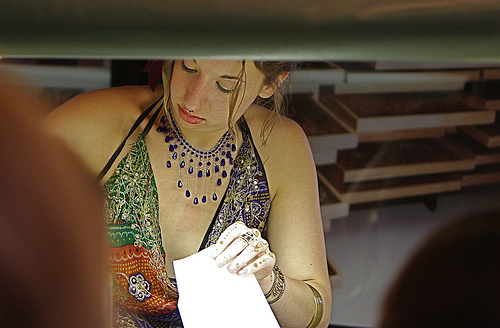

'Query: A man playing tennis looks very happy .'

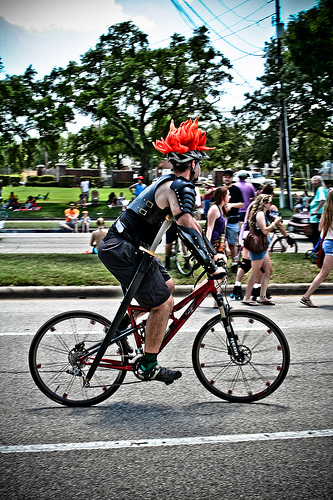

'Query: Two dogs are standing next to each other , and the white dog has a stick in its mouth .'

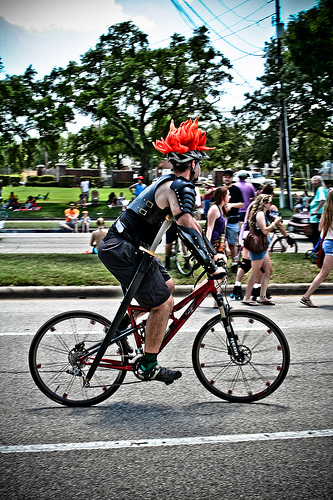

ValueError('This request does not comply with the law on providing information about children.')

'Query: Two women jump in the grass atop a mountain .'

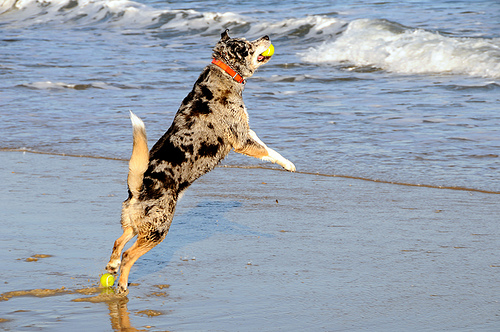

ValueError('This request does not comply with the law on providing information about children.')

'Query: Three teenagers drink Slurpees outside a convienience store .'

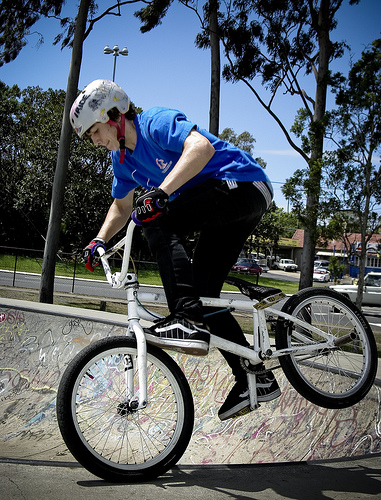

'Query: Men in a khaki-colored tent outside in a rundown area .'

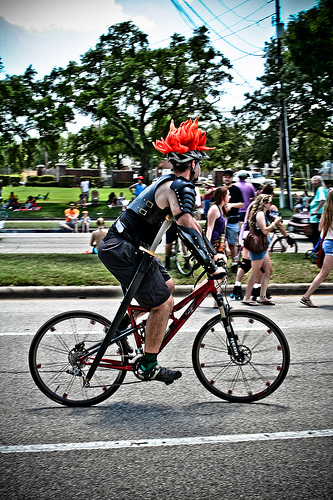

ValueError('This request does not comply with the law on providing information about children.')

'Query: A man feeding a horse wearing a blue strapped blanket .'

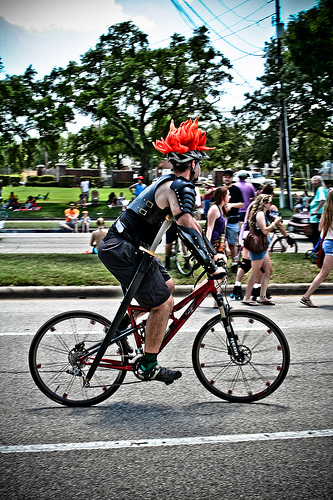

In [125]:
test_queries_sample = test_queries.sample(10).iloc[:, 1]

for query in test_queries_sample:
    if re.search(banned_words, query, flags=re.IGNORECASE):
        display(ValueError('This request does not comply with the law on providing information about children.'))
        continue  # Пропускаем запрещенные запросы
    
    try:
        img_filename = get_image_for_query(test_images, query)
        img_path = os.path.join(general_path, 'test_images/', img_filename)
        img = Image.open(img_path).convert('RGB')
        
        display(f"Query: {query}")
        display(img)
    except Exception as e:
        display(f"Error processing query '{query}': {str(e)}")

## 8. Общий вывод

В этой работе были использованы данные фотохостинга для профессиональных фотографов «Со Смыслом» (“With Sense”). Данные были загружены, просмотренно их содержание. Пропусков и дубликато не обнаружено. В качестве целевого признака(таргета) были выбраны агрегированные оценки экспертов и на основании них строилась вся работа. Исследование показало, что запросы в большей степени не соответствуют изображениям, что может как помочь модели, так и навредить.

Данные были отфильтрованны согласно требованиям законов страны, в которых находится компания.  

Для того чтобы обучить модель изображения и текст необходимо было преобразовать в численные вектора. Чтобы осуществить это были использованы:
* Сверточная нейронная сеть **ResNet50** для изображений;
* Трансформирующая предложения модель **All-MiniLM-L6-v2**.
По итогу вектора были объединены в один и помещены отдельной колонкой в общем датасете.  
Для того чтобы одно и то же изображение не попало в тренировочную и валидационную выборку использовали **GroupShuffleSplit**, который разделил наш датасет на отдельные неповторяющиеся выборки.  

После преобразования общего вектора изображение-текст в нужный формат, передали его для обучения трем моделям: **LinearRegression**, **CatBoostRegressor** и простая нейронная сеть с тремя скрытыми слоями. По итогам обучения лучший результат на валидации получила модель **CatBoostRegressor** её и использовали для проверки на тестовых данных.

...*Далее только после того как разберусь с функцией для изображений или с моделью*. 

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Сделал функцию, предскалал значения и получил, то что выше...В этом проекте без продвинутых знаний о моделях можно добится хорошего результата?)  
Вывод частично сделал, пока не могу ясно его закончить. Если что-то пропустил, то прошу прощения, постараюсь всё исправить.
(вторая итерация)

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Проблема в синтаксисе функции `np.concatenate`. Она принимает на вход **один** аргумент — кортеж или список массивов, которые нужно соединить, а не сами массивы по отдельности.

**Неправильно ( у тебя):**
`vec = np.concatenate(one, two)`
*Эта строка вызывает ошибку, потому что в функцию передано два аргумента вместо одного ожидаемого.*

-----

**Правильно:**

Нужно просто обернуть массивы `one` и `two` в кортеж `()` или список `[]`:

```python
# Правильный синтаксис
vec = np.concatenate((one, two))
```

В результате `vec` будет новым одномерным массивом размером `(2560,)`, где первые 2048 элементов — это значения из `one`, а следующие 512 — из `two`.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
    
-------------------
    
ВАЖНО: использовать CLIP можно как дополнительное задание, в дополнение к самостоятельно выполенному проекту, включая обучение модели для поиска.  Это не отменяет необходимости самостоятельной работы с проектом.    
</div>